In [2]:
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [6]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
df = pd.DataFrame(json.loads(res.content)['Data'])
df = df.set_index('time')
df.index = pd.to_datetime(df.index, unit='s')
target_col='close'

In [7]:
df

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2016-04-14,425.44,421.84,423.47,30664.40,1.303897e+07,424.02,direct,
2016-04-15,429.49,423.25,424.02,54119.98,2.321456e+07,428.67,direct,
2016-04-16,432.00,426.84,428.67,29021.18,1.251727e+07,430.05,direct,
2016-04-17,430.62,423.79,430.05,25586.86,1.098087e+07,426.26,direct,
2016-04-18,429.07,424.35,426.26,32574.71,1.395152e+07,427.69,direct,
...,...,...,...,...,...,...,...,...
2021-10-01,48470.13,43304.82,43829.34,53577.95,2.498576e+09,48164.35,direct,
2021-10-02,48347.69,47468.49,48164.35,16062.18,7.690222e+08,47669.02,direct,
2021-10-03,49185.34,47137.07,47669.02,18588.83,8.956068e+08,48234.05,direct,


In [8]:
#splitting data into training and testing
def train_test_split(df, test_size=0.4):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [11]:
def plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(16, 8))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

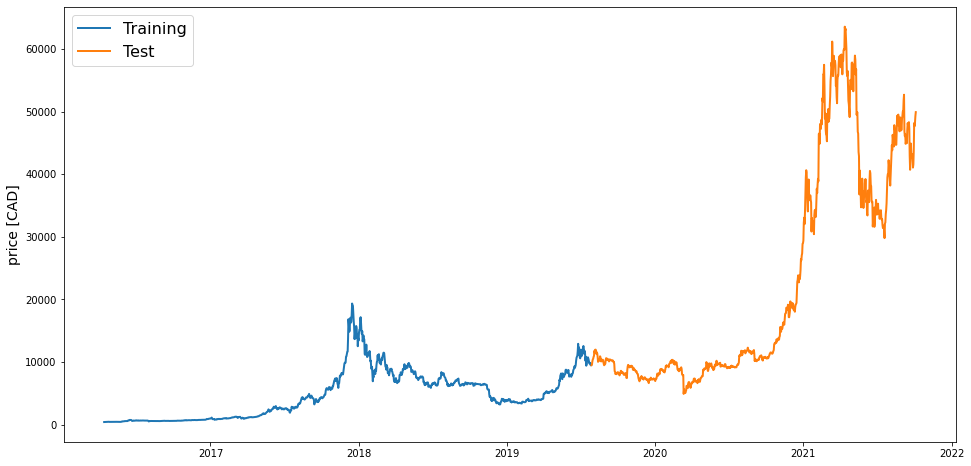

In [12]:
#graph that shows bitcoin price in dollars
plot(train[target_col], test[target_col], 'Training', 'Test', title='')

In [13]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [14]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for i in range(len(df) - window_len):
        tmp = df[i: (i + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [15]:
window_len = 5
zero_base = True

In [27]:
print(type(zero_base))

<class 'bool'>


In [16]:
train_data, test_data = train_test_split(df, test_size = 0.4)

In [29]:
x_train = extract_window_data(train_data, int(window_len), zero_base)

TypeError: ignored